<a href="https://colab.research.google.com/github/sujitojha1/EVA8/blob/main/Session7/EVA8_S7_CIFAR10_resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 8, Session7 : CIFAR 10

**Target**: 

- Train resnet18 for 20 epochs on the CIFAR10 dataset
- show loss curves for test and train datasets
- show a gallery of 10 misclassified images
- show gradcam Links to an external site.output on 10 misclassified images. Remember if you are applying GradCAM on a channel that is less than 5px, then please don't bother to submit the assignment. 😡🤬🤬🤬🤬
Once done, upload the code to GitHub, and share the code. This readme must link to the main repo so we can read your file structure. 
- Train for 20 epochs
  - Get 10 misclassified images
  - Get 10 GradCam outputs on any misclassified images (remember that you MUST use the library we discussed in the class)
- Apply these transforms while training:
    - RandomCrop(32, padding=4)
    - CutOut(16x16)
*   Target Accuracy is 85+%


## 1. Loading Module and Models 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/pytorch-eva8 -q --quiet
!mv pytorch-eva8/* .
print("Loaded EVA8 Modules and Models")

!rm -rf pytorch-eva8

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA8 Modules and Models
  Preparing metadata (setup.py) ... done



## 2. Loading train and test data with transforms and loader functions

In [3]:
from utils import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [4]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


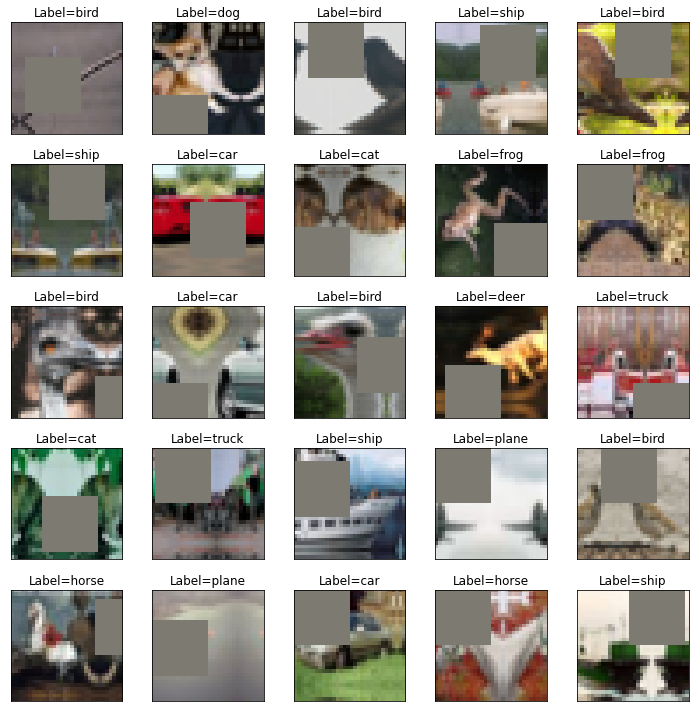

In [5]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [6]:
from models.resnet import *
import torch

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [7]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
    

# Training and Testing

In [8]:
# Load train and test model
from main import trainNetwork

trainObj, testObj = trainNetwork(net, device, trainloader, testloader, EPOCHS=20, lr=0.01)

Epoch: 0,Loss=1.55 Batch_id=390 Accuracy=38.96: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]


Test set: Average loss: 0.0110, Accuracy: 5085/10000 (50.85%)



Epoch: 1,Loss=1.18 Batch_id=390 Accuracy=53.60: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]


Test set: Average loss: 0.0092, Accuracy: 5914/10000 (59.14%)



Epoch: 2,Loss=1.09 Batch_id=390 Accuracy=59.54: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]


Test set: Average loss: 0.0080, Accuracy: 6400/10000 (64.00%)



Epoch: 3,Loss=0.79 Batch_id=390 Accuracy=63.96: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]


Test set: Average loss: 0.0072, Accuracy: 6770/10000 (67.70%)



Epoch: 4,Loss=0.89 Batch_id=390 Accuracy=67.33: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]


Test set: Average loss: 0.0058, Accuracy: 7500/10000 (75.00%)



Epoch: 5,Loss=0.80 Batch_id=390 Accuracy=69.68: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.0076, Accuracy: 7008/10000 (70.08%)



Epoch: 6,Loss=0.66 Batch_id=390 Accuracy=75.22: 100%|██████████| 391/391 [00:45<00:00,  8.58it/s]


Test set: Average loss: 0.0040, Accuracy: 8223/10000 (82.23%)



Epoch: 7,Loss=0.66 Batch_id=390 Accuracy=76.56: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]


Test set: Average loss: 0.0039, Accuracy: 8306/10000 (83.06%)



Epoch: 8,Loss=0.45 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]


Test set: Average loss: 0.0038, Accuracy: 8342/10000 (83.42%)



Epoch: 9,Loss=0.73 Batch_id=390 Accuracy=77.73: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]


Test set: Average loss: 0.0037, Accuracy: 8385/10000 (83.85%)



Epoch: 10,Loss=0.56 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]


Test set: Average loss: 0.0037, Accuracy: 8416/10000 (84.16%)



Epoch: 11,Loss=0.50 Batch_id=390 Accuracy=78.62: 100%|██████████| 391/391 [00:44<00:00,  8.69it/s]


Test set: Average loss: 0.0035, Accuracy: 8457/10000 (84.57%)



Epoch: 12,Loss=0.60 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.0034, Accuracy: 8504/10000 (85.04%)



Epoch: 13,Loss=0.45 Batch_id=390 Accuracy=79.57: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]


Test set: Average loss: 0.0034, Accuracy: 8531/10000 (85.31%)



Epoch: 14,Loss=0.63 Batch_id=390 Accuracy=79.31: 100%|██████████| 391/391 [00:44<00:00,  8.79it/s]


Test set: Average loss: 0.0034, Accuracy: 8511/10000 (85.11%)



Epoch: 15,Loss=0.73 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]


Test set: Average loss: 0.0034, Accuracy: 8526/10000 (85.26%)



Epoch: 16,Loss=0.64 Batch_id=390 Accuracy=79.71: 100%|██████████| 391/391 [00:44<00:00,  8.75it/s]


Test set: Average loss: 0.0033, Accuracy: 8525/10000 (85.25%)



Epoch: 17,Loss=0.49 Batch_id=390 Accuracy=79.63: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]


Test set: Average loss: 0.0033, Accuracy: 8548/10000 (85.48%)



Epoch: 18,Loss=0.47 Batch_id=390 Accuracy=79.68: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]


Test set: Average loss: 0.0033, Accuracy: 8535/10000 (85.35%)



Epoch: 19,Loss=0.52 Batch_id=390 Accuracy=79.70: 100%|██████████| 391/391 [00:44<00:00,  8.71it/s]


Test set: Average loss: 0.0033, Accuracy: 8545/10000 (85.45%)

Finished Training


# Plotting Train & Test Accuracy/Losses

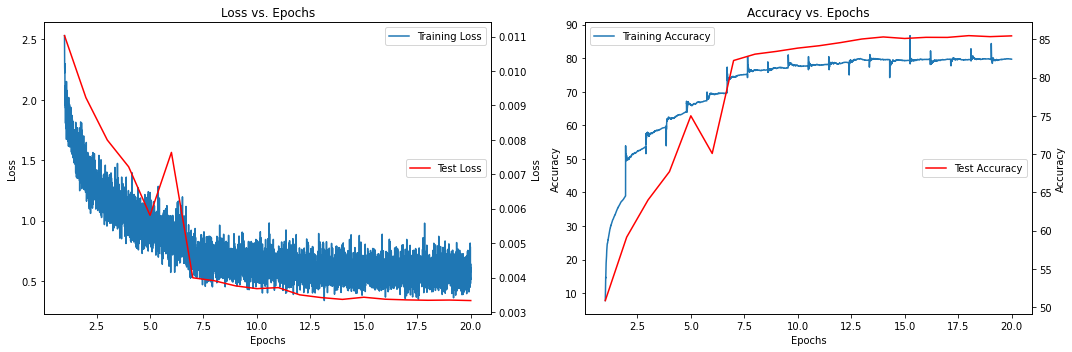

In [9]:
from utils import plot_loss_accuracy_graph
plot_loss_accuracy_graph(trainObj, testObj,EPOCHS=20)

# Evaluating test Accuracy over different classes 

In [10]:
def calClassAccuracy(net, dataloader, classes, device):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images,labels = images.to(device),labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [11]:
#from utils import calAccuracy
calClassAccuracy(net, testloader, classes, device)

Accuracy of plane : 81 %
Accuracy of   car : 100 %
Accuracy of  bird : 81 %
Accuracy of   cat : 79 %
Accuracy of  deer : 100 %
Accuracy of   dog : 62 %
Accuracy of  frog : 94 %
Accuracy of horse : 84 %
Accuracy of  ship : 89 %
Accuracy of truck : 94 %


## Misclassified Images

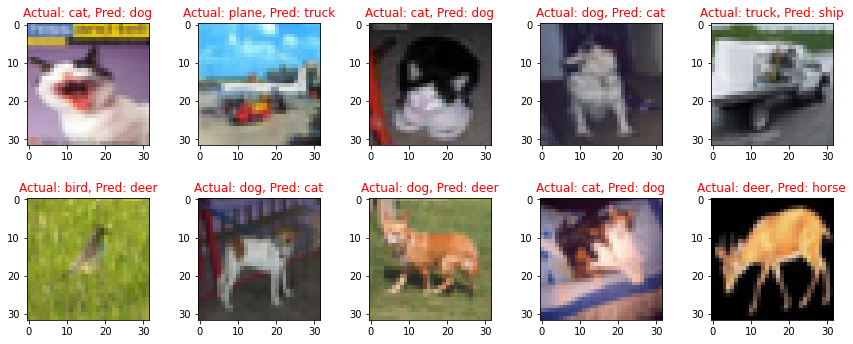

In [12]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)

## GradCAM images

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


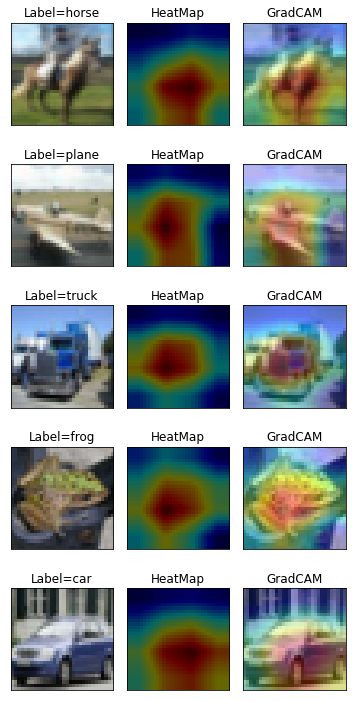

In [13]:
from utils import plotGradCAM
# initialize a model, model_dict and gradcam
net.eval()
plotGradCAM(net, testloader, classes, device)